<a href="https://colab.research.google.com/github/Eswari-21/Decision-Tree-Random-Forest-Regressor/blob/main/DS_exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

# Step 1: Load dataset (synthetic regression)
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Step 2: Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 4: Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [5]:
# Step 5: Evaluation Function
def evaluate(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")



Evaluation for Decision Tree Regressor
MSE: 396.45326210519363
RMSE: 19.911134124032053
R² Score: 0.9485919244889197

Evaluation for Random Forest Regressor
MSE: 421.02393950786427
RMSE: 20.518867890501763
R² Score: 0.9454058459268022


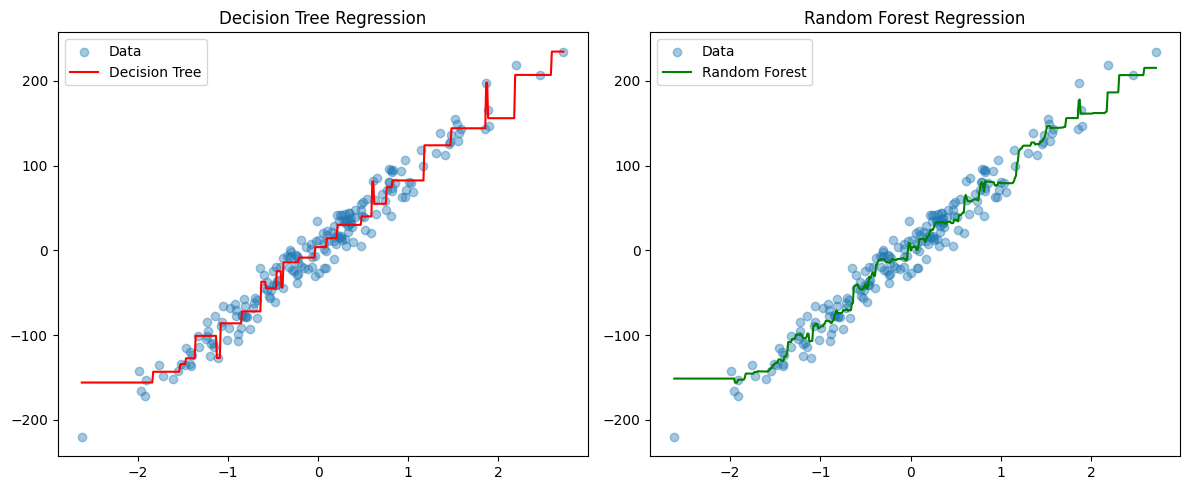

In [6]:

# Step 6: Visualization (only works for 1D synthetic dataset)
if X.shape[1] == 1:
    X_line = np.linspace(min(X.ravel()), max(X.ravel()), 500).reshape(-1, 1)
    y_dt_line = dt.predict(X_line)
    y_rf_line = rf.predict(X_line)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.4, label='Data')
    plt.plot(X_line, y_dt_line, color='red', label='Decision Tree')
    plt.title('Decision Tree Regression')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X, y, alpha=0.4, label='Data')
    plt.plot(X_line, y_rf_line, color='green', label='Random Forest')
    plt.title('Random Forest Regression')
    plt.legend()

    plt.tight_layout()
    plt.show()